### Introdução à Engenharia Biomédica (P4 - 2021/2022)
# Aula Prática #6 - Classificação

Name: (write here)

IST ID: (write here)

Date: (write here)

# I. Introduction
<br>
<div class="title"style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

# <div style="color:#fbb144"> 1. Background </div>

Biosignals are a rich source of information regarding a subject's characteristics and physiological states and have a multitude of applications. For instance, biosignals can be used for:
* Disease diagnosis (e.g., atrial fibrillation, sleep apnea, epilepsy)
* Activity monitoring (e.g., sports, fitness, driving)
* Security (e.g., biometric authentication and identification)
* Prognosis (e.g., epilepsy, emotions, health status)

To be able to automatically perform such tasks, computational algorithms need to be developed. In this class, we will cover the main principles around classification in Machine Learning using HRV features extracted from ECG recordings to detect Atrial Fibrillation.

# <div style="color:#fbb144"> 2. Objectives</div>
* Understand what is a binary classification problem and why it is important in physiological computing
* Get acquainted with the basics of the Scikit Learn library for Python
* Learn how to evaluate model performance based on simple classification metrics

# II. Classification in Machine Learning
<br>
<div style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>


# <div style="color:#fbb144"> 1. Project Pipeline </div>

<img src ="resources/ML_pipeline.png">

#### Problem Definition
- **What is the problem?** (formulation)
- Why does the problem need to be solved? (motivation)
- How would I solve the problem?

#### Data Collection
- What data sources already exist?
- What privacy concerns are there?
- Is the data public?
- Where should we store the files?
- **Is the data labelled?**

#### Data Preparation
- Perform Exploratory Data Analysis (EDA)
- **Data preprocessing** (e.g., filtering)
- Feature selection
- **Feature extraction**
- Dimensionality reduction
- Outlier detection
- Data scaling (normalization, standardization)
- **Data splitting** (train and test)

#### Model Training
- **Choose an algorithm** (supervised, unsupervised, semi-supervised)
- **Model fitting** (avoid under and overfitting)
- Hyperparameter Tuning (try different model parameters)

#### Performance Evaluation
- **Classification metrics** (e.g., accuracy, precision, confusion matrix)
- Cross-validation (test different train/test combinations)
- Compare with other models (State of the Art)

<a href="https://www.analyticsvidhya.com/blog/2021/04/steps-to-complete-a-machine-learning-project/">Reference</a> 
    
Some useful Python libraries for Machine Learning include:

* NumPy

* SciPy

* **Scikit Learn**

* Theano

* TensorFlow

* Keras

* PyTorch

* Pandas
 
* Matplotlib

* Seaborn

<a href="https://www.springboard.com/blog/data-science/python-libraries-for-machine-learning/">Reference</a>

# <div style="color:#fbb144"> 2. Binary Classification Problem </div>

Binary classification is a form of classification — the process of predicting categorical variables — where the output is restricted to two classes. For example, in medical diagnosis, a binary classifier for a specific disease could take in symptoms of a patient and predict whether the patient is healthy or has a disease. The possible outcomes of the diagnosis are positive (1) and negative (0).

In the case of Atrial Fibrillation detection in ECG recordings, we can define the classification problem as:

* **0** - Negative - ECG does not present Atrial Fibrillation *or* ECG is in Normal Sinus Rhythm (NSR)

* **1** - Positive - ECG presents Atrial Fibrillation

<img src="resources/nsr_vs_af.png" style="width:70%"/>

Popular algorithms that can be used for binary classification include:

* Logistic Regression

* **k-Nearest Neighbors**

* Decision Trees

* Support Vector Machine

* Naive Bayes


# III. Scikit Learn - Machine Learning in Python
<br>
<div style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" style="width:30%"/>

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

Scikit-learn can be installed using the **conda** or **pip** commmands:

```python
conda install scikit-learn # preferable for anaconda
!pip install scikit-learn
```

In [1]:
# conda install scikit-learn

Let's exemplify scikit-learn's usage with an implementation of the K-Nearest Neighbors algorithm:

# <div style="color:#fbb144">  1. k-Nearest Neighbors (k-NN) </div>


To start, we will use 3 ECG recordings:

* `ecg_normal.csv` (to *train* the model)

* `ecg_af.csv` (to *train* the model)

* `ecg_op3.csv` (to *test* the model)

Since the data are labelled (we already know their class), our goal is to train a simple k-NN model and test its performance using scikit-learn.

Let's first load the files, extract the features and prepare the data:

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Acquisition parameters
fs = 1000.

# Load train data
ecg_normal = np.loadtxt('resources/ecg_normal.csv')
ecg_af = np.loadtxt('resources/ecg_af.csv')

In [3]:
import biosppy as bp
def hrv(ecg, fs, show=False):
    
    out = bp.signals.ecg.ecg(ecg, fs, show=show)
    
    rpeaks = out['rpeaks']/fs*1000 # convert sample indexes to ms
    rri = np.diff(rpeaks) # compute RR intervals
    
    # Compute max of RRIs
    rr_max = np.max(rri)
    
    # Compute RMSSD
    rr_diff = np.diff(rri)
    
    rmssd = np.sqrt(np.mean(rr_diff**2))
    
    
    return np.array([rmssd, rr_max])

In [4]:
normal_hrv = hrv(ecg_normal, fs)
print(normal_hrv)

af_hrv = hrv(ecg_af, fs)
print(af_hrv)

[   0. 1000.]
[ 334.97904248 1072.        ]


In order to train the model, we will have to organize the input data in an ordered list, where `X` stands for the list of samples, and `y` the correspondent labels:

In [5]:
# Organize data
X = np.array([normal_hrv, af_hrv]) # feature vector
y = np.array([0, 1]) # data labels

Before the model implementation let's first visualize our train data and predict the outcome of the test data:

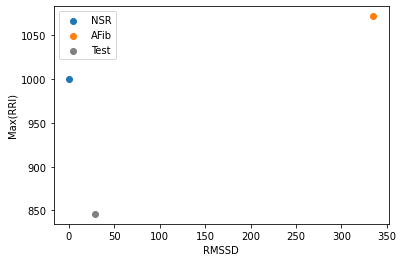

In [6]:
# Load test data
ecg1 = np.loadtxt('resources/ecg_op3.csv')
ecg1_hrv = hrv(ecg1, fs)

# Plot
plt.xlabel('RMSSD')
plt.ylabel('Max(RRI)')

plt.scatter(X[y==0][:,0], X[y==0][:,1], label='NSR', color='tab:blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], label='AFib', color='tab:orange')

plt.scatter(ecg1_hrv[0], ecg1_hrv[1], label='Test', color='gray')
plt.legend()
plt.show()

Using two features makes it easier to visualize. The test data is closer to the NSR data point, so we expect the k-NN algorithm to make its prediction accordingly:

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [8]:
# Organize data
X_test = np.array([ecg1_hrv]) # feature vector
y_test = np.array([0]) # data labels (for testing performance)

# Predict
y_pred = knn.predict(X_test)
print(y_pred)

y_test == y_pred

[0]


array([ True])

As we expected, the algorithm made a correct prediction. Now let's see how can we evaluate the performance of our classification algorithm:

<div style="background:#946db2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#d0b3e6;font-size:12px"> 
      To learn more about Scikit Learn funtionalities, visit <a href="https://scikit-learn.org/stable/">Scikit Learn</a>.
</div>

# IV. Evaluate Classification Performance
<br>
<div style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>


In the case of a binary classification problem, two distinct classes separate the data: one called positive and the other called negative. 

After training the classifier, a confusion matrix can be used to assess the number of correct and wrong predictions of the data used for testing, as in the figure below. The True Positive (TP) and True Negative (TN) represent the number of positive and negative samples that were correctly classified, respectively. In contrast, the False Positive (FP) and False Negative (FN) represent the number of positive and negative samples wrongly classified, respectively.

<img src="resources/confmat.png" style="width:40%"/>

# <div style="color:#fbb144">  2. Classification Metrics </div>

Classification metrics evaluate the performance of a specific characteristic of a classifier, and they are an essential tool to compare different classifiers with the same task. Combining the values from the confusion matrix, several metrics can be defined:

\begin{equation}
\text {Accuracy}=\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}
\label{eq:acc}
\end{equation}

\begin{equation}
\text { Precision }=\frac{\text { TP }}{\text { TP }+\text { FP }}
\label{eq:prec}
\end{equation}

\begin{equation}
\text { Recall }=\frac{\text { TP }}{\text { TP }+\text { FN }}
\label{eq:rec}
\end{equation}

\begin{equation}
\text { Specificity }=\frac{\text { TN }}{\text { TN }+\text { FP }}
\label{eq:spec}
\end{equation}

Using the `sklearn.metrics` submodule we can easily compute the metrics we are looking for:

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy = %3.1f%%" % (acc*100))

Accuracy = 100.0%


Because our model was able to correctly classify all the test data we had, the accuracy is 100%. However, our model may be too simple to handle the diversity of physiological variability, and for real world applications, we should have more train and test samples.

# V. Atrial Fibrillation Detection using HRV Features
<br>
<div style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

In this part, we will be using ECG recordings of a real dataset acquired using AliveCor's KardiaMobile, available in <a href="https://physionet.org/content/challenge-2017/1.0.0/">PhysioNet.org</a>, which contain 8528 single short ECG lead recordings sampled at 300 Hz.

In the folder `resources` you will find two files:
* *NSR_arrays.csv* containing 100 10-second ECG recordings in Normal Sinus Rhythm
* *AFib_arrays.csv* containing 100 10-second ECG recordings in Atrial Fibrillation

The recordings were extracted from the database and are already preprocessed using BioSPPy.

<img src="https://cdn.shopify.com/s/files/1/0368/7037/products/kardiamobile-reading-transparent_8339f9ac-8960-4af6-b7cc-643a3b6c6c75.png?v=1653598347&width=1445" style="width:40%"/>

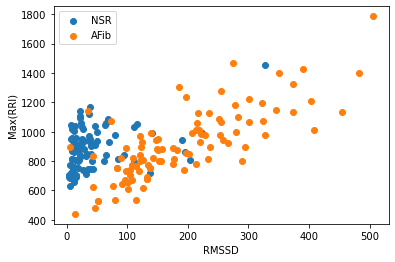

In [10]:
# Imports
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load data
NSR_arrays = np.loadtxt('resources/NSR_arrays.csv') 
AFib_arrays = np.loadtxt('resources/AFib_arrays.csv')
fs = 300. # Hz

# Compute hrv metrics
NSR_hrv = []
for i in NSR_arrays:
    NSR_hrv.append(hrv(i, fs))

AFib_hrv = []
for i in AFib_arrays:
    AFib_hrv.append(hrv(i, fs))



# Train-test split
X = np.concatenate((NSR_hrv, AFib_hrv))
y = np.zeros(len(X))
y[len(NSR_hrv):] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Create and fit classifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)


# Plot
plt.xlabel('RMSSD')
plt.ylabel('Max(RRI)')

plt.scatter(X[y==0][:,0], X[y==0][:,1], label='NSR', color='tab:blue')
plt.scatter(X[y==1][:,0], X[y==1][:,1], label='AFib', color='tab:orange')

plt.legend()
plt.show()

Confusion matrix, without normalization
[[26  3]
 [ 4 33]]
Accuracy = 89.4%


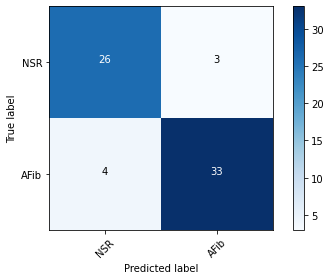

In [11]:
from functions import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

# Test data
y_pred = knn.predict(X_test)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, ['NSR', 'AFib'])

acc = accuracy_score(y_test, y_pred)
print("Accuracy = %3.1f%%" % (acc*100))

* https://scikit-learn.org/stable/getting_started.html

* https://machinelearningmastery.com/how-to-define-your-machine-learning-problem/

* https://www.analyticsvidhya.com/blog/2021/04/steps-to-complete-a-machine-learning-project/

<tr>
<td> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IT.png?raw=true" alt="Drawing" style="width:200px"/> </td>

<td> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IST.png?raw=true" alt="Drawing"
style="width:200px"/> </td>
</tr>

```Contributors:  ``` Ana Fred, Hugo Plácido da Silva and Rafael Silva